<a href="https://colab.research.google.com/github/Clalloures/100daysofcode/blob/master/ML_Introdu%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aqui vamos fazer uma série de notebooks com uma revisão de ML. Essa revisão vai servir de base para criação de conteúdos no Clatech. 

Materiais utilizados: Alura, Youtube, Udemy, Coursera

# Primeiro projeto : Porco ou Cachorro

Vamos fazer a classificação de duas classes (classificação binária). Para isso vamos identificar entre zero e um.

In [14]:
from sklearn.svm import LinearSVC

In [15]:
#features
# pelo longo?
# perna curta?
# faz au au?

porco1 = [0,1,0]
porco2 = [0,1,1]
porco3 = [1,1,0]

cachorro1 = [0,1,1]
cachorro2 = [1,0,1]
cachorro3 = [1,1,1]


In [16]:
treinamento_x = [porco1, porco2, porco3, cachorro1, cachorro2, cachorro3]

In [17]:
treinamento_y = [1,1,1,0,0,0]

In [18]:
model = LinearSVC()
model.fit(treinamento_x, treinamento_y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [19]:
animal_misterioso = [1,1,1]

In [20]:
model.predict([animal_misterioso])

array([0])

Array([0]) == Cachorro

In [21]:
animal_misterioso1 = [1,1,1]
animal_misterioso2 = [1,1,0]
animal_misterioso3 = [0,1,1]

In [22]:
 testes_y = [0,1,1]
 
 teste_x = animal_misterioso1, animal_misterioso2, animal_misterioso3

 previsoes = model.predict(teste_x)

 previsoes == testes_y

array([ True,  True, False])

Lúcio começou a estudar sobre aprendizado de máquinas(Machine learning) na Alura, para no futuro, trabalhar como analista de dados. Ele aprendeu que, para que o aprendizado da máquina seja eficiente, é necessário treinar o algoritmo em uma determinada ordem.

Qual é a ordem correta para treinar o algoritmo?

Com a definição do modelo para treino e com as listas de dados para treino e para teste, nós conseguimos efetuar o treinamento. - Definir um modelo de treino, definir uma lista com dados para treino e dados com os resultados esperados, treinar com base na lista de dados e nos resultados esperados.

# Projeto 2: Acesso ao site

In [25]:
import pandas as pd

uri = 'https://gist.githubusercontent.com/guilhermesilveira/2d2efa37d66b6c84a722ea627a897ced/raw/10968b997d885cbded1c92938c7a9912ba41c615/tracking.csv'

dados = pd.read_csv(uri)

dados.head()

,home,how_it_works,contact,bought
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


In [29]:
x = dados[["home", "how_it_works", "contact"]]
y = dados["bought"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: bought, dtype: int64

In [32]:
mapa = {
    "home": "principal",
    "how_it_works" : "como_funciona",
    "contact" : "contato",
    "bought" : "comprou"
}
dados = dados.rename(columns = mapa)

In [33]:
x = dados[["principal", "como_funciona", "contato"]]
y = dados["comprou"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: comprou, dtype: int64

In [34]:
dados.shape

(99, 4)

In [35]:
treino_x = x[:75]
treino_y = y[:75]

teste_x = x[75:]
teste_y = y[75:]

print("Treinamentos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

Treinamentos com 75 elementos e testaremos com 24 elementos


In [40]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

In [41]:
modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

In [43]:
taxa_de_acerto = accuracy_score(teste_y, previsoes)

In [47]:
print("A Acurácia foi %.2f%%" % (taxa_de_acerto *100))

A Acurácia foi 95.83%


In [48]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

SEED = 20
treino_x, teste_x, treino_y, teste_y = train_test_split(x,y, random_state = SEED, test_size = 0.25, stratify = y)

print("Treinamentos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)
taxa_de_acerto = accuracy_score(teste_y, previsoes)
print("A Acurácia foi %.2f%%" % (taxa_de_acerto *100))

Treinamentos com 74 elementos e testaremos com 25 elementos
A Acurácia foi 96.00%


In [49]:
treino_y.value_counts()

0    49
1    25
Name: comprou, dtype: int64

In [50]:
teste_y.value_counts()

0    17
1     8
Name: comprou, dtype: int64

# Projeto 3: Desenvolvimento Projeto

In [52]:
import pandas as pd

uri = 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'

dados = pd.read_csv(uri)

dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [54]:
mapa = {
    "expected_hours": "horas_esperadas",
    "price" : "preco",
    "unfinished" : "nao_finalizado",
}
dados = dados.rename(columns = mapa)
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [55]:
troca = {
    0:1,
    1:0
}

dados['finalizado'] = dados.nao_finalizado.map(troca)
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


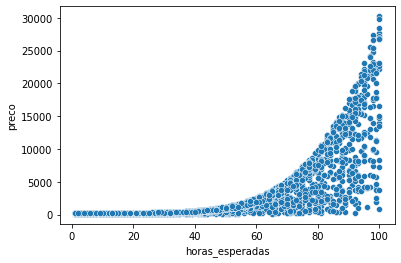

In [56]:
import seaborn as sns

sns.scatterplot(x="horas_esperadas", y="preco", data=dados)

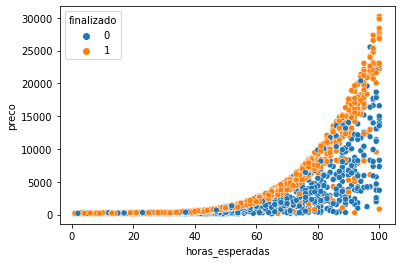

In [57]:
sns.scatterplot(x="horas_esperadas", y="preco", hue="finalizado", data=dados)

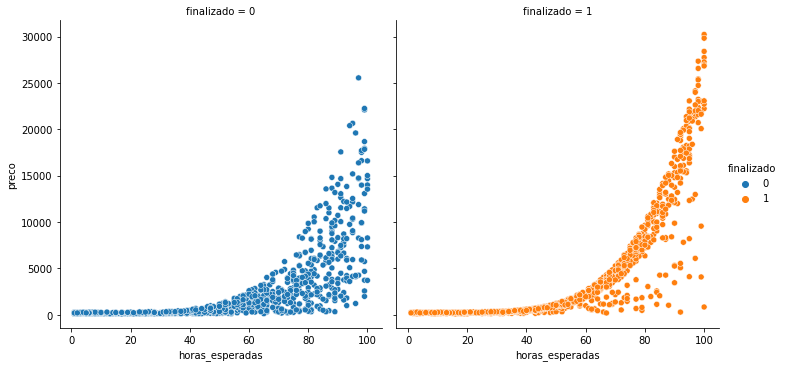

In [59]:
sns.relplot(x="horas_esperadas", y="preco",hue="finalizado", col="finalizado", data=dados)

In [60]:
x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado']

In [86]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x,y, test_size = 0.25, stratify = y)

print("Treinamentos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)
taxa_de_acerto = accuracy_score(teste_y, previsoes)
print("A Acurácia foi %.2f%%" % (taxa_de_acerto *100))

Treinamentos com 1617 elementos e testaremos com 540 elementos
A Acurácia foi 64.44%


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [87]:
import numpy as np
previsoes_de_base = np.ones(540)
acuracia1 = accuracy_score(teste_y, previsoes_de_base) * 100
print("A Acurácia foi %.2f%%" % (acuracia1 ))

A Acurácia foi 52.59%


In [88]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()
print(x_min, x_max, y_min, y_max)

1 100 100 30223


In [89]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/ pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/ pixels)

In [90]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.992177e+04],
       [9.802000e+01, 2.992177e+04],
       [9.901000e+01, 2.992177e+04]])

In [91]:
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
Z

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

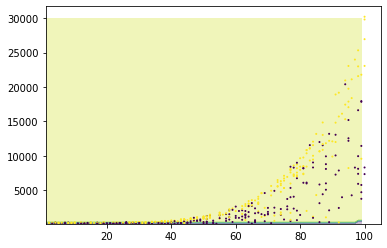

In [92]:
import matplotlib.pyplot as plt


plt.contourf(xx,yy,Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

In [102]:
from sklearn.svm import SVC

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 55.19%


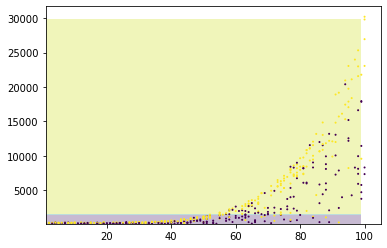

In [103]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

In [104]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 66.85%


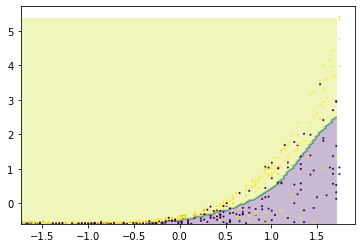

In [110]:
data_x = teste_x[:,0]
data_y = teste_x[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=teste_y, s=1)

# Projeto 4: Carros

In [129]:
import pandas as pd

uri = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'

dados = pd.read_csv(uri)

dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [130]:
mapa = {
    "mileage_per_year": "milhas_por_ano",
    "model_year" : "ano_do_modelo",
    "price" : "preco",
    "sold" : "vendido"
}
dados = dados.rename(columns = mapa)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [131]:
troca = {
    'no':0,
    'yes':1
}

dados['vendido'] = dados.vendido.map(troca)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [132]:
from datetime import datetime

ano_atual = datetime.today().year
dados['idade_do_modelo'] = ano_atual - dados.ano_do_modelo
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,21
1,1,7843,1998,40557.96,1,23
2,2,7109,2006,89627.50,0,15
3,3,26823,2015,95276.14,0,6
4,4,7935,2014,117384.68,1,7


In [133]:
dados['km_por_ano'] = dados.milhas_por_ano * 1.60934
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,21,35085.22134
1,1,7843,1998,40557.96,1,23,12622.05362
2,2,7109,2006,89627.50,0,15,11440.79806
3,3,26823,2015,95276.14,0,6,43167.32682
4,4,7935,2014,117384.68,1,7,12770.11290


In [134]:
dados = dados.drop(columns = ["Unnamed: 0", "milhas_por_ano", "ano_do_modelo"], axis=1)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,21,35085.22134
1,40557.96,1,23,12622.05362
2,89627.50,0,15,11440.79806
3,95276.14,0,6,43167.32682
4,117384.68,1,7,12770.11290


In [135]:
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,21,35085.22134
1,40557.96,1,23,12622.05362
2,89627.50,0,15,11440.79806
3,95276.14,0,6,43167.32682
4,117384.68,1,7,12770.11290


In [141]:
x = dados[["preco", "idade_do_modelo", "km_por_ano"]]
y = dados["vendido"]

In [142]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)


Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 77.48%


In [143]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = DecisionTreeClassifier()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)


Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 73.20%


In [149]:
!pip install graphviz==0.10
!apt-get install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


In [150]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(modelo, out_file=None)
grafico = graphviz.Source(dot_data)
grafico

In [160]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)


Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 79.28%


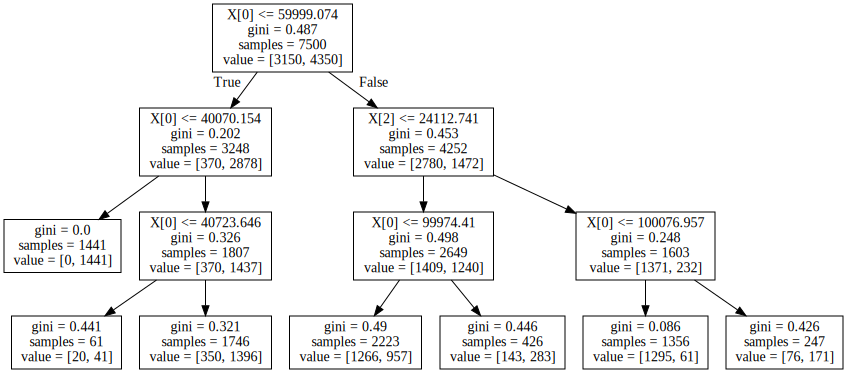

In [161]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(modelo, out_file=None)
grafico = graphviz.Source(dot_data)
grafico

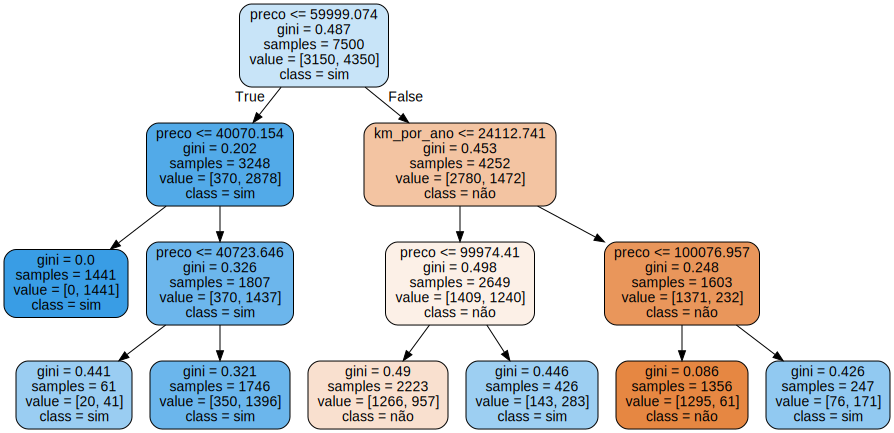

In [162]:
import graphviz
from sklearn.tree import export_graphviz

features = x.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True, feature_names= features, class_names= ["não", "sim"])
grafico = graphviz.Source(dot_data)
grafico